In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import os
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import RDConfig
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import knime
style.use('ggplot')

In [17]:
train_path = os.path.join(RDConfig.RDDocsDir, 'Book/data/solubility.train.sdf')
test_path = os.path.join(RDConfig.RDDocsDir, 'Book/data/solubility.test.sdf')

train_mols = [m for m in Chem.SDMolSupplier(train_path)]
train_y = np.asarray([m.GetProp('SOL') for m in train_mols], dtype=np.float32)
train_table = {'smiles':[Chem.MolToSmiles(m) for m in train_mols]}
train_df = pd.DataFrame(train_table)

test_mols =  [m for m in Chem.SDMolSupplier(test_path)]
test_y = np.asanyarray([m.GetProp('SOL') for m in test_mols], dtype=np.float32)
test_table = {'smiles':[Chem.MolToSmiles(m) for m in test_mols]}
test_df = pd.DataFrame(test_table)

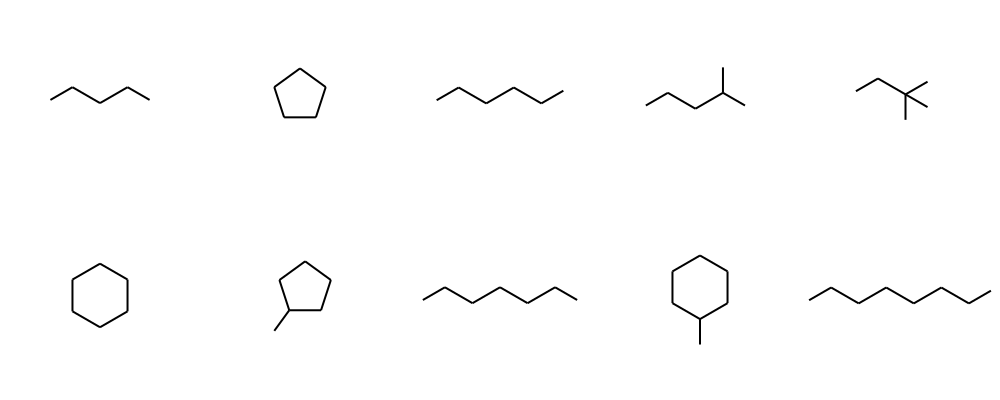

In [18]:
Draw.MolsToGridImage(train_mols[:10], molsPerRow=5)

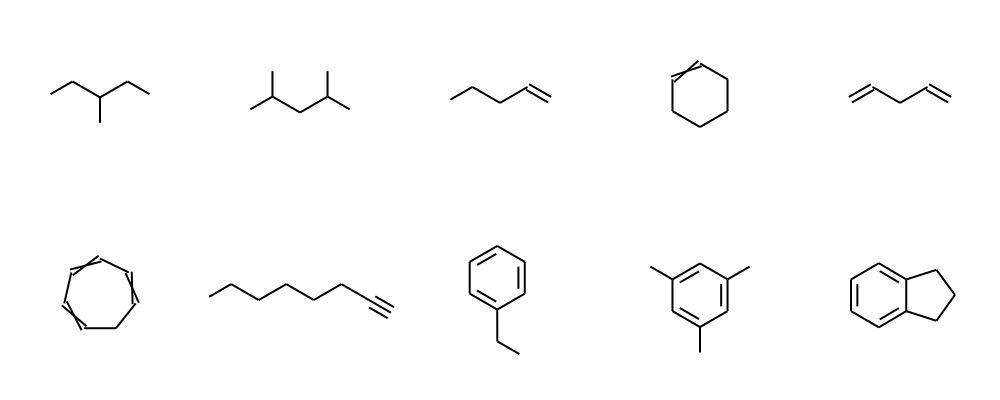

In [19]:
Draw.MolsToGridImage(test_mols[:10], molsPerRow=5)

In [20]:
#My Knime env uploaded to 3.7 from 3.6.
knime.executable_path = '/Applications/KNIME 3.6.1.app/Contents/MacOS/Knime'
workspace = '/Users/iwatobipen/knime-workspace/'

In [21]:
workflow = 'jupyter_integration'

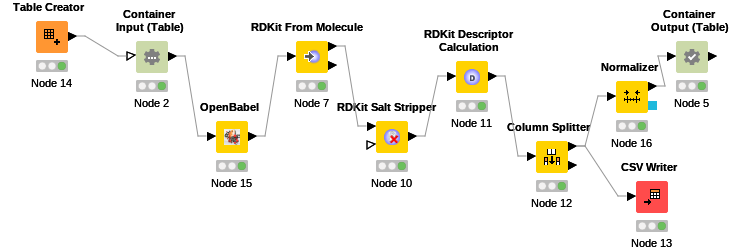

In [22]:
knime.Workflow(workflow_path=workflow, workspace_path=workspace)

In [23]:
with knime.Workflow(workflow_path=workflow, workspace_path=workspace) as wf:
    wf.data_table_inputs[0] = train_df
    wf.execute()
train_x = wf.data_table_outputs[0]

In [24]:
with knime.Workflow(workflow_path=workflow, workspace_path=workspace) as wf:
    wf.data_table_inputs[0] = test_df
    wf.execute()
test_x = wf.data_table_outputs[0]

In [25]:
svr = SVR()
svr.gamma = 'auto'

In [26]:
svr.fit(train_x, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
pred = svr.predict(test_x)

In [28]:
print(r2_score(test_y, pred))
print(mean_squared_error(test_y, pred))
a, b = min(test_y), max(test_y)
data = np.linspace(a,b, num=100)

0.703289693583441
1.2055499665537373


Text(0,0.5,'actual')

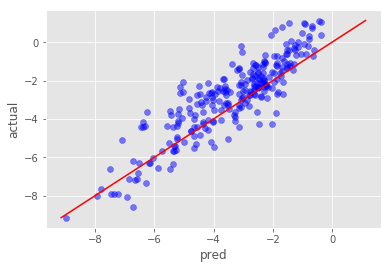

In [29]:
plt.scatter(pred, test_y, c='b', alpha=0.5)
plt.plot(data, data, c='r')
plt.xlabel('pred')
plt.ylabel('actual')